## Barotropic model

The initial pressure situation chosen by Richardson to demostrate a bartropic model is a zonal wavenumber one perturbation given by:

$$p_s=10^4 sin^2\phi\:cos\phi\:sin\lambda$$

This equation represents the change in the surface pressure field as function of latitude $\phi$ and longitude $\lambda$.

In [63]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

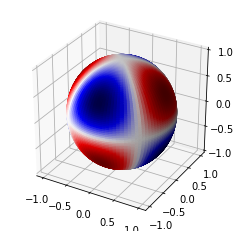

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
#ax.set_axis_off()
plt.show()

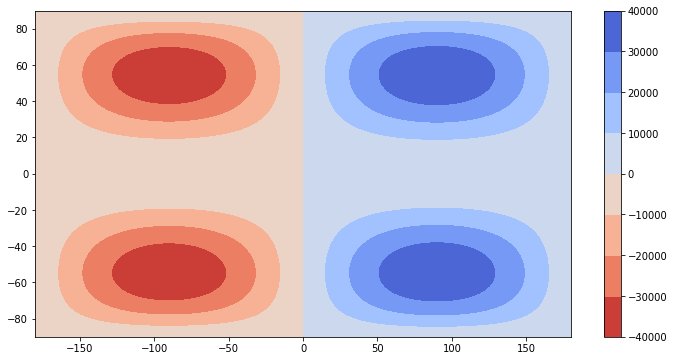

In [44]:
%matplotlib inline

from IPython.display import Markdown as md
import numpy as np
from matplotlib import pyplot as plt

ϕ = np.linspace(90,-90,181)
λ = np.linspace(-180,180,361)

λλ, ϕϕ = np.meshgrid(np.radians(λ),np.radians(ϕ))

ps = 10e4*np.square(np.sin(ϕϕ))*np.cos(ϕϕ)*np.sin(λλ)
ps = 10e4*(np.sin(ϕϕ)**2)*np.cos(ϕϕ)*np.sin(λλ)
plt.figure(figsize=(12,6))
plt.contourf(λ,ϕ,ps, cmap='coolwarm_r')
plt.colorbar()

In [11]:
max_ϕi, max_λi = np.unravel_index(np.argmax(ps, axis=None), ps.shape)

md(f"This image represents two low pressure systems, centered on the western part of each hemisphere and two low pressure systems on the eastern half of the world. maxima of magnitude {ps.max()/1000:.1f} hPa at {λ[max_λi]} East and {ϕ[max_ϕi]} North and South, and corresponding minima in the western hemisphere at the antipodes of the maxima.")

This image represents two low pressure systems, centered on the western part of each hemisphere and two low pressure systems on the eastern half of the world. maxima of magnitude 38.5 hPa at 90.0 East and 55.0 North and South, and corresponding minima in the western hemisphere at the antipodes of the maxima.



$$U=-10^4 \frac{h}{2\Omega a} (2sin^2\phi-cos^2\phi)\:sin\lambda$$
$$V=10^4 \frac{h}{2\Omega a} sin\phi\:cos\lambda$$

-990917.9336159385


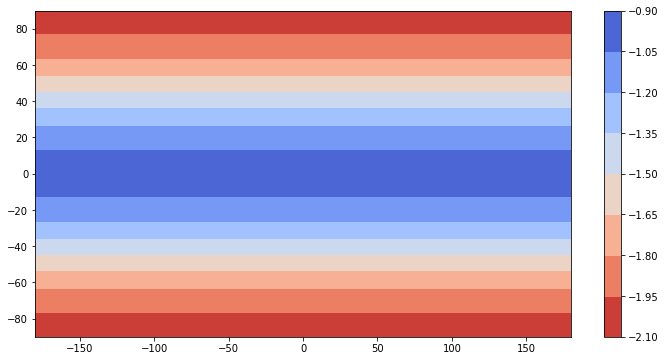

In [59]:
plt.figure(figsize=(12,6))
#plt.contourf(λ,ϕ,(2*np.square(np.sin(ϕϕ))-np.square(np.cos(ϕϕ)))*np.sin(λλ), cmap='coolwarm_r')
plt.contourf(λ,ϕ,-(2*(np.sin(ϕϕ)**2))-(np.cos(ϕϕ)**2), cmap='coolwarm_r')
plt.colorbar()
print(-10e4*(h/(Ω2*a)))

-1981835.867231877 90 (181, 361)


(0, 90)

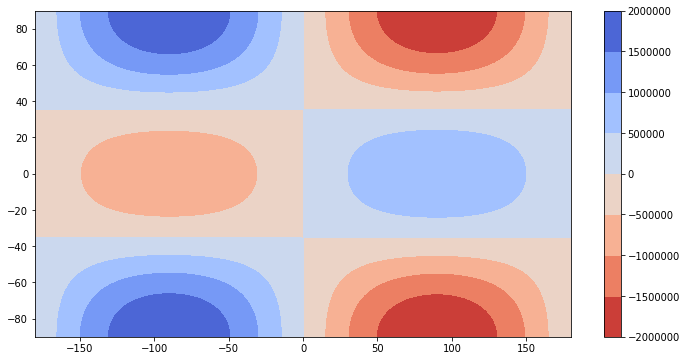

In [57]:
h = 9200

# Earth's angular velocity
Ω2 = 1.458423e-4

# Earth's radius
a = 6.366e6

U = -10e4*(h/(Ω2*a))*((2*np.square(np.sin(ϕϕ)))-np.square(np.cos(ϕϕ)))*np.sin(λλ)
#U = 2*np.square(np.sin(ϕϕ))-np.square(np.cos(ϕϕ))*np.sin(λλ)
plt.figure(figsize=(12,6))
plt.contourf(λ,ϕ,U, cmap='coolwarm_r')
plt.colorbar()

print(U.min(),U.argmax(), U.shape)
np.unravel_index(np.argmax(U, axis=None), U.shape)

To compute the tendency, we need the divergence on the black squares. For this, we require the zonal wind in the white squares to the east and west, and the meridional wind in the white squares to the north and south of each black square.

$$\frac{\partial P}{\partial t} + gh \nabla \cdot V = 0$$

$$\frac{\partial P}{\partial t} + \frac{gh}{a\:cos\phi} \left(\frac{\Delta U}{\Delta \lambda}+\frac{\Delta (V cos \phi)}{\Delta \phi}\right)=0$$

In [55]:
# Gravitational acceleration
g = 9.79

# Earth's angular velocity
Ω = 1.458423e-4/2

# Earth's radius
a = 6.366e6

λ0 = 0
ϕ0 = 50.4

Δλ = 5.625
Δϕ = 3.6

Δt = 2700 #3/4 hour

ϕ = np.radians(np.array([ϕ0+Δϕ/2, ϕ0, ϕ0-Δϕ/2]))
cosϕ = np.cos(ϕ)

#λ = np.radians(np.array([λ0-Δλ, λ0, λ0+Δλ]))

cosϕ[0]

0.6129070536529766

In [2]:
Ue = -1064.44
Uw = 1064.44

ΔU = Ue - Uw

ΔU/np.radians(Δλ)

-21684.593615966347

In [3]:
Vn = 78295.45
Vs = 74327.53

(Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ)

-18554.98251712508

In [4]:
divV = (1/(a*cosϕ[1])) * (ΔU/np.radians(Δλ) + (Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ))

divV

-0.009916498688737384

In [35]:
δp = -g*divV

Δp = δp*Δt/100
Δp # hPa

2.6212280983939524